This script generates base editing guide RNA library for a subset of frequently mutated mutations (for both human and mouse).  

In [2]:
import bioh2m as h2m
from pegg import prime
from pegg import base
import pandas as pd
df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human.csv')

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# For Human  

In [14]:
df_all

,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,KRAS,ENST00000256078.4,25398284,25398284,C,T,SNP,AACR-H0000001,12
1,PIK3CA,ENST00000263967.3,178936091,178936091,G,A,SNP,AACR-H0000004,3
2,PIK3CA,ENST00000263967.3,178952085,178952085,A,G,SNP,AACR-H0000005,3
3,TP53,ENST00000269305.4,7578406,7578406,C,T,SNP,AACR-H0000007,17
4,PIK3CA,ENST00000263967.3,178936082,178936082,G,A,SNP,AACR-H0000008,3
...,...,...,...,...,...,...,...,...,...
3138,FGFR3,ENST00000260795.2,1806162,1806162,C,T,SNP,AACR-H0005025,4
3139,NTRK2,ENST00000323115.4,87359980,87359980,C,T,SNP,AACR-H0005026,9
3140,EGFR,ENST00000275493.2,55211111,55211111,C,T,SNP,AACR-H0005027,7
3141,XPO1,ENST00000401558.2,61719275,61719275,T,C,SNP,AACR-H0005028,2


In [41]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict_h, i = prime.genome_loader(path_h_ref)
chrom_dict_m, i = prime.genome_loader(path_m_ref)

In [7]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_be_h = base.run_base(df_all, 'cBioPortal', chrom_dict_h, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_h

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,20,False,ABE,gRNA_0,44.0,GAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGGCC,GAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGGCC,reverse-complement,No Error,False
1,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,18,False,ABE,gRNA_1,54.0,TGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGG,TGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGG,reverse-complement,No Error,False
2,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,16,False,ABE,gRNA_2,59.0,CATGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCA,CATGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCA,reverse-complement,No Error,False
3,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,3,False,ABE,gRNA_3,59.0,ACAGCAAGGCTGGCATGGAGGAAGATCACACCTACGAGGT,ACAGCAAGGCTGGCATGGAGGAAGATCACACCCACGAGGT,reverse-complement,No Error,False
4,1,CD79B,ENSMUST00000044228.11,62006798,62006798,T,C,SNP,AACR-H0002993-M01,17,...,8,True,ABE,gRNA_4,66.0,GCTGGGCCTGCCCCTCTCCTTACCTCGTAGGTGTGATCTT,GCTGGGCCTGCCCCTCTCCTTACCTCGCAGGTGTGATCTT,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,18,False,ABE,gRNA_15376,38.0,GCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAGGAAG,GCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAGGAAG,reverse-complement,No Error,False
15377,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,16,False,ABE,gRNA_15377,46.0,GAGCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAGGA,GAGCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAGGA,reverse-complement,No Error,False
15378,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,14,False,ABE,gRNA_15378,60.0,TAGAGCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAG,TAGAGCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAG,reverse-complement,No Error,False
15379,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,6,True,ABE,gRNA_15379,41.0,CCAAATCTTAGAGCAATGGACCACACTTTTCCGGGGCAGG,CCAAATCTTAGAGCAATGGACCACACTTTCCCGGGGCAGG,reverse-complement,No Error,False


In [8]:
list(set(df_all['ID'])-set(df_be_h['ID']))

['AACR-H0002363-M01',
 'AACR-H0002999-M01',
 'AACR-H0002588-M01',
 'AACR-H0003738-M01',
 'AACR-H0002965-M01',
 'AACR-H0005030-M01',
 'AACR-H0000928-M01',
 'AACR-H0000291-M01',
 'AACR-H0001653-M01',
 'AACR-H0004831-M01',
 'AACR-H0004152-M01',
 'AACR-H0003347-M01',
 'AACR-H0000973-M01',
 'AACR-H0000313-M01',
 'AACR-H0001629-M01']

In [12]:
df_be_h['ID'] = [x[:-4] for x in df_be_h['ID']]

In [14]:
df_be_h.to_csv('be_human_result',index=False)

# For Mouse  

In [39]:
df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse.csv')

In [3]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [16]:
df_all.columns = ['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index','chr_h']
df_all = h2m.query_batch(df_all)[0]
df_all = h2m.get_tx_batch(df_all, 'm')[0]
df_result, df_fail = h2m.model_batch(df_all, records_h, index_list_h, records_m, index_list_m, db_h, db_m, 37, param='BE', memory_size=2000)

No error occurs.
No error occurs.
There were rows that could not be processed.


In [44]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_be_m = base.run_base(df_all, 'cBioPortal', chrom_dict_m, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_m

,mutation_idx,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,19,False,CBE,gRNA_0,48.0,GTGGTGGTTGGAGCTGGTGGCGTAGGCAAGAGCGCCTTGA,GTGGTGGTTGGAGCTGATGGCGTAGGCAAGAGCGCCTTGA,reverse-complement,No Error,False
1,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,3,False,CBE,gRNA_1,68.0,GACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTA,GACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTA,reverse-complement,No Error,False
2,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,11,False,CBE,gRNA_2,15.0,CGGGACCCACTATCTGAAATCACTGAACAAGAGAAAGACT,CGGGACCCACTATCTGAAATCACTAAACAAGAGAAAGACT,reverse-complement,No Error,False
3,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,7,True,CBE,gRNA_3,47.0,CACCCGGGACCCACTATCTGAAATCACTGAACAAGAGAAA,CACCCGGGACCCACTATCTGAAATCACTAAACAAGAGAAA,reverse-complement,No Error,False
4,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,5,True,CBE,gRNA_4,47.0,TGCACCCGGGACCCACTATCTGAAATCACTGAACAAGAGA,TGCACCCGGGACCCACTATCTGAAATCACTAAACAAGAGA,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,14,False,ABE,gRNA_10102,59.0,CTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAATA,CTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAATA,reverse-complement,No Error,False
10103,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,13,False,ABE,gRNA_10103,60.0,CCTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAAT,CCTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAAT,reverse-complement,No Error,False
10104,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,6,True,ABE,gRNA_10104,24.0,ACTTGAACCTGAACAAAATGCCTACGGCATTTTTGAGCTA,ACTTGAACCTGAACAAAATGCCTACGGCACTTTTGAGCTA,reverse-complement,No Error,False
10105,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,1,False,ABE,gRNA_10105,33.0,CTCCAACTTGAACCTGAACAAAATGCCTACGGCATTTTTG,CTCCAACTTGAACCTGAACAAAATGCCTACGGCACTTTTG,reverse-complement,No Error,True


In [45]:
df_be_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse_rusult.csv',index=False)

# Bind mouse and human 

In [46]:
df_be_h = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human_result')

In [51]:
pd.concat([df_be_h.drop(['gRNA_id','tx_id_h'], axis=1), df_be_m.drop(['gRNA_id','tx_id_m'], axis=1)]).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv',index=False)

In [1]:
import bioh2m as h2m

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [23]:
df_sift_h = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv')
df_sift_m = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_mouse.csv')

In [24]:
df_sift_h = df_sift_h[df_sift_h['Variant_Type']=='SNP'].reset_index(drop=True)
df_sift_m = df_sift_m[df_sift_m['Variant_Type']=='SNP'].reset_index(drop=True)

In [33]:
df_sift_h

,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,KRAS,ENST00000256078.4,25398284,25398284,C,T,SNP,AACR-H0000001,12
1,KRAS,ENST00000256078.4,25398284,25398284,C,A,SNP,AACR-H0000002,12
2,BRAF,ENST00000288602.6,140453136,140453136,A,T,SNP,AACR-H0000003,7
3,PIK3CA,ENST00000263967.3,178936091,178936091,G,A,SNP,AACR-H0000004,3
4,PIK3CA,ENST00000263967.3,178952085,178952085,A,G,SNP,AACR-H0000005,3
...,...,...,...,...,...,...,...,...,...
4471,FGFR3,ENST00000260795.2,1806162,1806162,C,T,SNP,AACR-H0005025,4
4472,NTRK2,ENST00000323115.4,87359980,87359980,C,T,SNP,AACR-H0005026,9
4473,EGFR,ENST00000275493.2,55211111,55211111,C,T,SNP,AACR-H0005027,7
4474,XPO1,ENST00000401558.2,61719275,61719275,T,C,SNP,AACR-H0005028,2


In [102]:
h2m.query('KMT2D')

Query human gene: KMT2D;
Mouse ortholog(s): Kmt2d;
Homology type: one2one;
Sequence Simalarity(%):88.9471.


[{'gene_name_m': 'Kmt2d',
  'gene_id_m': 'ENSMUSG00000048154',
  'homology_type': 'ortholog_one2one',
  'similarity': 88.9471}]

In [100]:
h2m.query('KIT')

Query human gene: KIT;
Mouse ortholog(s): Kit;
Homology type: one2one;
Sequence Simalarity(%):82.7869.


[{'gene_name_m': 'Kit',
  'gene_id_m': 'ENSMUSG00000005672',
  'homology_type': 'ortholog_one2one',
  'similarity': 82.7869}]

In [32]:
df_sift_m

,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,T,SNP,AACR-H0000001-M01-V01,6
1,Kras,ENSMUST00000111710.8,145192497.0,145192497.0,C,A,SNP,AACR-H0000002-M01-V01,6
2,Braf,ENSMUST00000002487.15,39604717.0,39604717.0,A,T,SNP,AACR-H0000003-M01-V01,6
3,Pik3ca,ENSMUST00000029201.14,32502197.0,32502197.0,G,A,SNP,AACR-H0000004-M01-V01,3
4,Pik3ca,ENSMUST00000029201.14,32516913.0,32516913.0,A,G,SNP,AACR-H0000005-M01-V01,3
...,...,...,...,...,...,...,...,...,...
3173,Trp53,ENSMUST00000108658.10,69480068.0,69480068.0,A,C,SNP,AACR-H0005024-M01-V01,11
3174,Ntrk2,ENSMUST00000079828.7,59022231.0,59022231.0,C,T,SNP,AACR-H0005026-M01-V01,13
3175,Egfr,ENSMUST00000020329.13,16810181.0,16810181.0,C,T,SNP,AACR-H0005027-M01-V01,11
3176,Xpo1,ENSMUST00000102869.8,23235114.0,23235114.0,A,G,SNP,AACR-H0005028-M01-V01,11


# Build all SNP into a VCF file 

In [57]:
df_sift_h['Reference_Allele'] = df_sift_h['Reference_Allele'].fillna('')
df_sift_m['Reference_Allele'] = df_sift_m['Reference_Allele'].fillna('')

In [71]:
sift_h = df_sift_h[['Chromosome',
                       'Start_Position',
                       'ID',
                       'Reference_Allele',
                       'Tumor_Seq_Allele2']]

In [75]:
sift_h = sift_h.sort_values('Chromosome').reset_index(drop=True)

In [82]:
sift_h['QUAL'] = None
sift_h['FILTER'] = 'PASS'
sift_h['INFO'] = '-'
sift_h['FORMAT'] = '-'
sift_h['MP96-Ripoll-MRC-Harwell'] = '-'

In [86]:
sift_h = sift_h.sort_values(by=['Chromosome','Start_Position']).reset_index(drop=True)

In [87]:
sift_h.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_h.txt',sep='\t', index=False)

In [ ]:
##fileformat=VCFv4.1									
#CHROM	POS	ID	REF	ALT	QUAL	FILTER	INFO	FORMAT	MP96-Ripoll-MRC-Harwell

# Cut KIT AACR #>=5 and run SIFT  

In [103]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv')

In [3]:
df_binded = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/database-output-final/df_result_cleaned.csv')

In [5]:
df_input = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/aacr_input_original.csv')

In [4]:
df_kit = df_binded[(df_binded['gene_name_h']=='KIT') & (df_binded['status']==True) & (df_binded['type_h']=='SNP') & (df_binded['Database']=='AACR')]
del df_binded

In [6]:
df_input_sub = df_input[(df_input['gene_name_h']=='KIT') & (df_input['count']>=5)]

In [7]:
df_kit = df_kit[df_kit['ID_human'].isin(df_input_sub['ID'])]
df_kit = df_kit.reset_index(drop=True)

In [119]:
df_kit

,gene_name_h,gene_id_h,tx_id_h,chr_h,exon_num_h,strand_h,match,start_h,end_h,ref_seq_h,...,start_m,end_m,ref_seq_m,alt_seq_m,HGVSc_m,HGVSp_m,ID_human,ID_mouse,Database,ID_db
0,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593610,55593610,T,...,75801387.0,75801387.0,T,G,ENSMUST00000005815.7:c.1685T>G,V562G,AACR-H0000156,AACR-H0000156-M01-V01,AACR,NaN
1,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55599159,55599159,G,...,75810135.0,75810135.0,G,A,ENSMUST00000005815.7:c.2368-72G>A,NaN,AACR-H0000368,AACR-H0000368-M01-V01,AACR,NaN
2,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55599321,55599321,A,...,75810292.0,75810292.0,A,T,ENSMUST00000005815.7:c.2453A>T,D818V,AACR-H0000390,AACR-H0000390-M01-V01,AACR,NaN
3,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593661,55593661,T,...,75801438.0,75801438.0,T,C,ENSMUST00000005815.7:c.1736T>C,L579P,AACR-H0000420,AACR-H0000420-M01-V01,AACR,NaN
4,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593613,55593613,T,...,75801390.0,75801390.0,T,G,ENSMUST00000005815.7:c.1688T>G,V563G,AACR-H0000423,AACR-H0000423-M01-V01,AACR,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55604668,55604668,C,...,75815150.0,75815151.0,CG,AT,ENSMUST00000005815.7:c.2885_2886CG>AT,S962Y,AACR-H0048399,AACR-H0048399-M01-V02,AACR,NaN
125,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55604638,55604638,C,...,75815108.0,75815108.0,C,T,ENSMUST00000005815.7:c.2843C>T,P948L,AACR-H0048772,AACR-H0048772-M01-V01,AACR,NaN
126,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55603445,55603445,A,...,75813984.0,75813984.0,A,G,ENSMUST00000005815.7:c.2807A>G,H936R,AACR-H0048819,AACR-H0048819-M01-V01,AACR,NaN
127,KIT,ENSG00000157404.11,ENST00000288135.5,chr4,21,+,True,55593586,55593586,C,...,75801363.0,75801363.0,C,T,ENSMUST00000005815.7:c.1661C>T,P554L,AACR-H0049226,AACR-H0049226-M01-V01,AACR,NaN


In [120]:
sift_h = df_kit[['chr_h',
                       'start_h',
                       'ID_human',
                       'ref_seq_h',
                       'alt_seq_h']].drop_duplicates().reset_index(drop=True)
sift_h['QUAL'] = None
sift_h['FILTER'] = 'PASS'
sift_h['INFO'] = '-'
sift_h['FORMAT'] = '-'
sift_h['MP96-Ripoll-MRC-Harwell'] = '-'

In [29]:
sift_h = df_kit[['chr_h',
                       'start_h',
                       'ID_human',
                       'ref_seq_h',
                       'alt_seq_h']].drop_duplicates().reset_index(drop=True)
sift_h['QUAL'] = None
sift_h['FILTER'] = 'PASS'
sift_h['INFO'] = '-'
sift_h['FORMAT'] = '-'
sift_h['MP96-Ripoll-MRC-Harwell'] = '-'


In [30]:
sift_h = sift_h.sort_values('start_h').reset_index(drop=True)

In [123]:
sift_h = sift_h.sort_values('start_h').reset_index(drop=True)
sift_h.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_h.txt',sep='\t', index=False)

In [9]:
sift_m = df_kit[['chr_m',
                       'start_m',
                       'ID_human',
                       'ref_seq_m',
                       'alt_seq_m']].dropna().reset_index(drop=True).drop_duplicates().reset_index(drop=True)
sift_m['QUAL'] = None
sift_m['FILTER'] = 'PASS'
sift_m['INFO'] = '-'
sift_m['FORMAT'] = '-'
sift_m['start_m'] = [int(x) for x in sift_m['start_m']] 
sift_m['MP96-Ripoll-MRC-Harwell'] = '-'
sift_m = sift_m.sort_values('start_m').reset_index(drop=True)
sift_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_m.txt',sep='\t', index=False)

In [10]:
sift_m

,chr_m,start_m,ID_human,ref_seq_m,alt_seq_m,QUAL,FILTER,INFO,FORMAT,MP96-Ripoll-MRC-Harwell
0,chr5,75735766,AACR-H0010107,C,T,None,PASS,-,-,-
1,chr5,75735782,AACR-H0003061,G,A,None,PASS,-,-,-
2,chr5,75767719,AACR-H0004152,C,T,None,PASS,-,-,-
3,chr5,75767760,AACR-H0012039,GTT,ATG,None,PASS,-,-,-
4,chr5,75767760,AACR-H0010103,GTT,CTC,None,PASS,-,-,-
...,...,...,...,...,...,...,...,...,...,...
124,chr5,75815140,AACR-H0010923,AGG,CAA,None,PASS,-,-,-
125,chr5,75815150,AACR-H0048399,CG,AC,None,PASS,-,-,-
126,chr5,75815150,AACR-H0048399,CG,AT,None,PASS,-,-,-
127,chr5,75815155,AACR-H0014362,G,A,None,PASS,-,-,-


In [11]:
list_of_print = []
for i,x in sift_m.iterrows():
    xx = int(x['start_m'])
    list_of_print.append(f'chr5 {xx} {xx}')

In [12]:
len(list_of_print)

129

In [13]:
print('\n'.join(list_of_print))

chr5 75735766 75735766
chr5 75735782 75735782
chr5 75767719 75767719
chr5 75767760 75767760
chr5 75767760 75767760
chr5 75767760 75767760
chr5 75767760 75767760
chr5 75767760 75767760
chr5 75767760 75767760
chr5 75767772 75767772
chr5 75767800 75767800
chr5 75767908 75767908
chr5 75767925 75767925
chr5 75769941 75769941
chr5 75769983 75769983
chr5 75769995 75769995
chr5 75769996 75769996
chr5 75770032 75770032
chr5 75770061 75770061
chr5 75770067 75770067
chr5 75770070 75770070
chr5 75770082 75770082
chr5 75770096 75770096
chr5 75770121 75770121
chr5 75770122 75770122
chr5 75770133 75770133
chr5 75771384 75771384
chr5 75771556 75771556
chr5 75776021 75776021
chr5 75776039 75776039
chr5 75776067 75776067
chr5 75781617 75781617
chr5 75783672 75783672
chr5 75783689 75783689
chr5 75797949 75797949
chr5 75797975 75797975
chr5 75797977 75797977
chr5 75799681 75799681
chr5 75799764 75799764
chr5 75799775 75799775
chr5 75799804 75799804
chr5 75801203 75801203
chr5 75801233 75801233
chr5 758012

In [14]:
import pandas as pd

# 读取 BED 文件
bed_file_path = 'path/to/your/file.bed'
bed_df = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/X8rB807q36rSPJRt.bed', sep='\t', header=None)

# 设置列名（根据 BED 文件格式）
#bed_df.columns = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand']

In [15]:
bed_df

,0,1,2
0,chr5,75575106,75575106
1,chr5,75575122,75575122
2,chr5,75607059,75607059
3,chr5,75607100,75607100
4,chr5,75607100,75607100
...,...,...,...
124,chr5,75654480,75654480
125,chr5,75654490,75654490
126,chr5,75654490,75654490
127,chr5,75654495,75654495


In [16]:
len(list(bed_df.iloc[:,1]))

129

In [17]:
sift_m['start_m'] = list(bed_df.iloc[:,1])
sift_m = sift_m.sort_values('start_m').reset_index(drop=True)
sift_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_m.txt',sep='\t', index=False)

In [18]:
import seaborn as sns

In [19]:
sift_m_result = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_m_SIFT_kit.csv')

In [27]:
sub_result_m = sift_m_result[['POS','REF_ALLELE','ALT_ALLELE','SIFT_SCORE','SIFT_PREDICTION']]
sub_result_m.columns = ['start_m','ref_seq_m','alt_seq_m','SIFT_SCORE','SIFT_PREDICTION']
sub_result_m = pd.merge(sift_m,sub_result_m, how='outer',on = ['start_m','ref_seq_m','alt_seq_m'])

In [31]:
sift_h_result = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/sift_h_SIFT_kit.csv')
sub_result_h = sift_h_result[['POS','REF_ALLELE','ALT_ALLELE','SIFT_SCORE','SIFT_PREDICTION']]
sub_result_h.columns = ['start_h','ref_seq_h','alt_seq_h','SIFT_SCORE','SIFT_PREDICTION']
sift_h_result = pd.merge(sift_h,sub_result_h, how='outer',on = ['start_h','ref_seq_h','alt_seq_h'])

In [40]:
sift_h_result_plot = sift_h_result[['ID_human','SIFT_SCORE','SIFT_PREDICTION']]
sift_h_result_plot.columns = ['ID_human','SIFT_SCORE_h','SIFT_PREDICTION_h']

In [41]:
sift_m_result_plot = sub_result_m[['ID_human','SIFT_SCORE','SIFT_PREDICTION']]
sift_m_result_plot.columns = ['ID_human','SIFT_SCORE_m','SIFT_PREDICTION_m']

In [78]:
df_SIFT_kit = pd.merge(sift_h_result_plot, sift_m_result_plot, on = 'ID_human').dropna()

In [79]:
df_SIFT_kit = pd.merge(df_SIFT_kit, df_kit[['ID_human','HGVSp_h','HGVSp_m','class']], on = 'ID_human').drop_duplicates()

In [80]:
df_SIFT_kit = pd.merge(df_SIFT_kit, df_kit[['ID_human','flank_size_left','flank_size_right']], on = 'ID_human').drop_duplicates()

In [81]:
df_SIFT_kit['flank_size'] = [1+int(x[:-2])+int(y[:-2]) for x,y in zip(df_SIFT_kit['flank_size_left'], df_SIFT_kit['flank_size_right'])]

In [82]:
df_SIFT_kit = pd.merge(df_SIFT_kit, df_kit[['ID_human','classification_h']], on = 'ID_human').drop_duplicates()

In [83]:
df_SIFT_kit = df_SIFT_kit[df_SIFT_kit['classification_h']!='Silent']

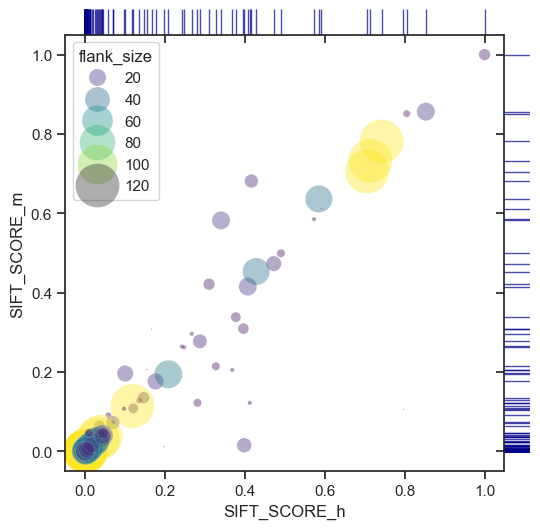

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
sns.set_theme(style="ticks", color_codes=True)

# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=df_SIFT_kit["flank_size"]+1, sizes=(1, 1000),
             color="g", alpha=.4, 
             hue=df_SIFT_kit["flank_size"],  # 添加颜色映射
            palette="viridis",
            legend=True)
g.plot_marginals(sns.rugplot, height=1, color="darkblue", alpha=.7)


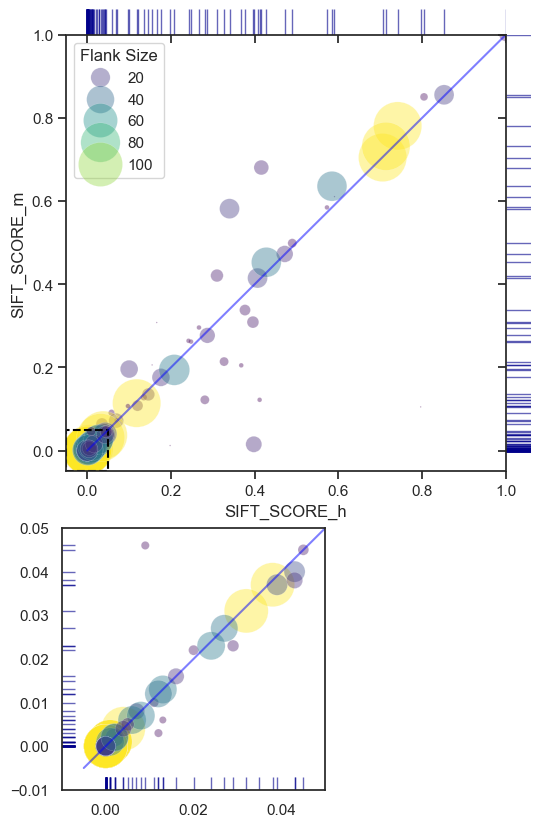

In [129]:

# 设置字体
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
sns.set_theme(style="ticks", color_codes=True)

# 创建 JointGrid 并绘制自定义图
g = sns.JointGrid(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", space=0, ratio=17)

# 绘制带颜色映射的散点图
g.plot_joint(
    sns.scatterplot, 
    size=df_SIFT_kit["flank_size"], 
    sizes=(1, 1200), 
    hue=df_SIFT_kit["flank_size"],  # 添加颜色映射
    palette="viridis",  # 选择一个 colormap
    alpha=.4, 
    legend=True
)

# 添加边缘 rugplot
g.plot_marginals(sns.rugplot, height=1, color="darkblue", alpha=.6)

# 在 (0-0.05, 0-0.05) 区域添加虚线正方形框
rect = Rectangle((-.05, -.05), 0.1, 0.1, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
g.ax_joint.add_patch(rect)

# 设置主图的 x 和 y 轴范围
g.ax_joint.set_xlim(-.05, 1)
g.ax_joint.set_ylim(-.05, 1)

# 创建放大区域的 inset axes，大小为主图的 0.6 倍，位置在下方左对齐
ax_inset = inset_axes(g.ax_joint, width="60%", height="60%", loc='lower left',
                      bbox_to_anchor=(-.08, -.8, 1, 1), bbox_transform=g.ax_joint.transAxes, borderpad=2)

# 在 inset axes 中绘制放大区域的散点图
sns.scatterplot(
    data=df_SIFT_kit, 
    x="SIFT_SCORE_h", 
    y="SIFT_SCORE_m", 
    size="flank_size", 
    sizes=(1, 1000), 
    hue="flank_size", 
    palette="viridis", 
    alpha=.4, 
    legend=False,  # 在 inset axes 中不需要图例
    ax=ax_inset
)

# 设置放大区域的 x 和 y 轴范围
ax_inset.set_xlim(-.01, 0.05)
ax_inset.set_ylim(-.01, 0.05)

# 添加 inset axes 的 rugplot
sns.rugplot(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", height=0.05, color="darkblue", alpha=.6, ax=ax_inset)
# 去除 inset axes 的刻度
ax_inset.tick_params(left=False, bottom=False)

# 在主图中添加透明的实线对角线
g.ax_joint.plot([0, 1], [0, 1], color='blue', alpha=0.5, linestyle='-')

# 在 inset axes 中添加透明的实线对角线
ax_inset.plot([-.005, 0.05], [-.005, 0.05], color='blue', alpha=0.5, linestyle='-')

ax_inset.set_xlabel('')
ax_inset.set_ylabel('')
ax_inset.tick_params(left=False, bottom=False)
g.ax_joint.legend(title="Flank Size")

plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/SIFT/flank_size_no_limit.svg')
plt.show()


In [126]:
df_SIFT_kit_ori = df_SIFT_kit

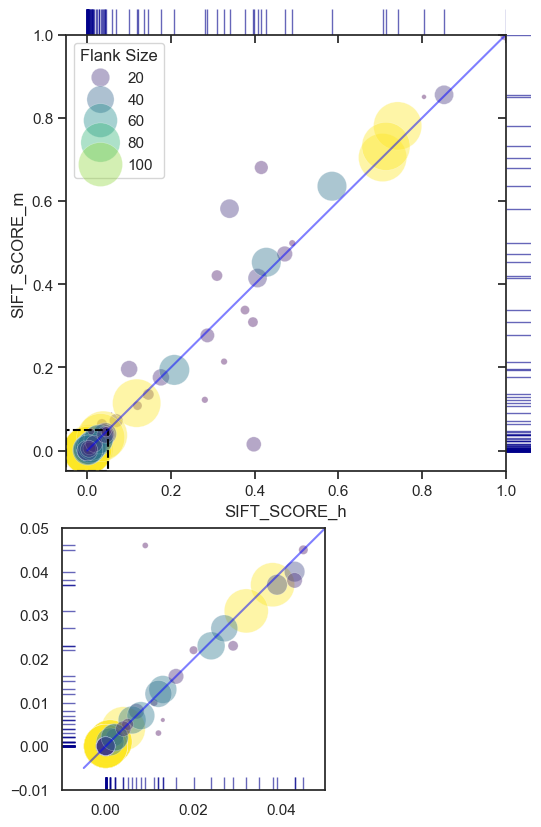

In [130]:
df_SIFT_kit = df_SIFT_kit_ori[df_SIFT_kit_ori['flank_size']>=3]

# 创建 JointGrid 并绘制自定义图
g = sns.JointGrid(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", space=0, ratio=17)

# 绘制带颜色映射的散点图
g.plot_joint(
    sns.scatterplot, 
    size=df_SIFT_kit["flank_size"], 
    sizes=(1, 1200), 
    hue=df_SIFT_kit["flank_size"],  # 添加颜色映射
    palette="viridis",  # 选择一个 colormap
    alpha=.4, 
    legend=True
)

# 添加边缘 rugplot
g.plot_marginals(sns.rugplot, height=1, color="darkblue", alpha=.6)

# 在 (0-0.05, 0-0.05) 区域添加虚线正方形框
rect = Rectangle((-.05, -.05), 0.1, 0.1, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
g.ax_joint.add_patch(rect)

# 设置主图的 x 和 y 轴范围
g.ax_joint.set_xlim(-.05, 1)
g.ax_joint.set_ylim(-.05, 1)

# 创建放大区域的 inset axes，大小为主图的 0.6 倍，位置在下方左对齐
ax_inset = inset_axes(g.ax_joint, width="60%", height="60%", loc='lower left',
                      bbox_to_anchor=(-.08, -.8, 1, 1), bbox_transform=g.ax_joint.transAxes, borderpad=2)

# 在 inset axes 中绘制放大区域的散点图
sns.scatterplot(
    data=df_SIFT_kit, 
    x="SIFT_SCORE_h", 
    y="SIFT_SCORE_m", 
    size="flank_size", 
    sizes=(1, 1000), 
    hue="flank_size", 
    palette="viridis", 
    alpha=.4, 
    legend=False,  # 在 inset axes 中不需要图例
    ax=ax_inset
)

# 设置放大区域的 x 和 y 轴范围
ax_inset.set_xlim(-.01, 0.05)
ax_inset.set_ylim(-.01, 0.05)

# 添加 inset axes 的 rugplot
sns.rugplot(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", height=0.05, color="darkblue", alpha=.6, ax=ax_inset)
# 去除 inset axes 的刻度
ax_inset.tick_params(left=False, bottom=False)

# 在主图中添加透明的实线对角线
g.ax_joint.plot([0, 1], [0, 1], color='blue', alpha=0.5, linestyle='-')

# 在 inset axes 中添加透明的实线对角线
ax_inset.plot([-.005, 0.05], [-.005, 0.05], color='blue', alpha=0.5, linestyle='-')

ax_inset.set_xlabel('')
ax_inset.set_ylabel('')
ax_inset.tick_params(left=False, bottom=False)
g.ax_joint.legend(title="Flank Size")

plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/SIFT/flank_size_limit_3.svg')
plt.show()


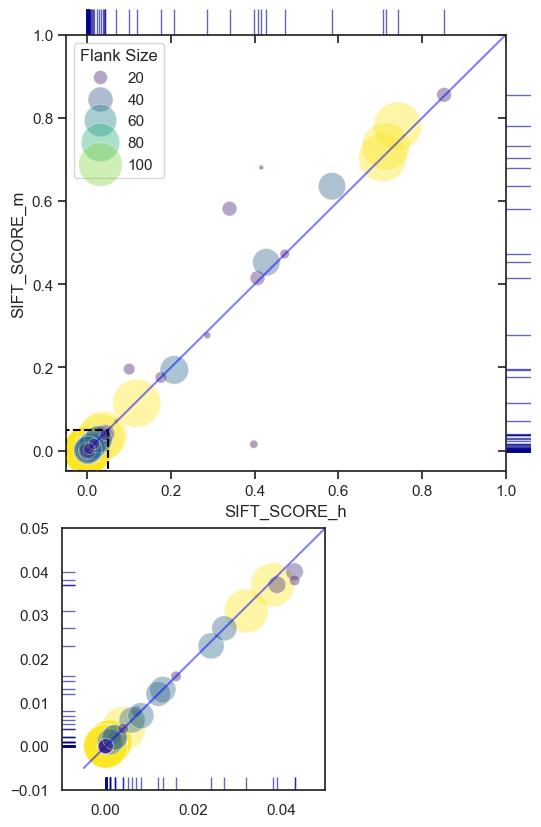

In [131]:
df_SIFT_kit = df_SIFT_kit_ori[df_SIFT_kit_ori['flank_size']>=11]

# 创建 JointGrid 并绘制自定义图
g = sns.JointGrid(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", space=0, ratio=17)

# 绘制带颜色映射的散点图
g.plot_joint(
    sns.scatterplot, 
    size=df_SIFT_kit["flank_size"], 
    sizes=(1, 120), 
    hue=df_SIFT_kit["flank_size"],  # 添加颜色映射
    palette="viridis",  # 选择一个 colormap
    alpha=.4, 
    legend=True
)

# 添加边缘 rugplot
g.plot_marginals(sns.rugplot, height=1, color="darkblue", alpha=.6)

# 在 (0-0.05, 0-0.05) 区域添加虚线正方形框
rect = Rectangle((-.05, -.05), 0.1, 0.1, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
g.ax_joint.add_patch(rect)

# 设置主图的 x 和 y 轴范围
g.ax_joint.set_xlim(-.05, 1)
g.ax_joint.set_ylim(-.05, 1)

# 创建放大区域的 inset axes，大小为主图的 0.6 倍，位置在下方左对齐
ax_inset = inset_axes(g.ax_joint, width="60%", height="60%", loc='lower left',
                      bbox_to_anchor=(-.08, -.8, 1, 1), bbox_transform=g.ax_joint.transAxes, borderpad=2)

# 在 inset axes 中绘制放大区域的散点图
sns.scatterplot(
    data=df_SIFT_kit, 
    x="SIFT_SCORE_h", 
    y="SIFT_SCORE_m", 
    size="flank_size", 
    sizes=(1, 1000), 
    hue="flank_size", 
    palette="viridis", 
    alpha=.4, 
    legend=False,  # 在 inset axes 中不需要图例
    ax=ax_inset
)

# 设置放大区域的 x 和 y 轴范围
ax_inset.set_xlim(-.01, 0.05)
ax_inset.set_ylim(-.01, 0.05)

# 添加 inset axes 的 rugplot
sns.rugplot(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", height=0.05, color="darkblue", alpha=.6, ax=ax_inset)
# 去除 inset axes 的刻度
ax_inset.tick_params(left=False, bottom=False)

# 在主图中添加透明的实线对角线
g.ax_joint.plot([0, 1], [0, 1], color='blue', alpha=0.5, linestyle='-')

# 在 inset axes 中添加透明的实线对角线
ax_inset.plot([-.005, 0.05], [-.005, 0.05], color='blue', alpha=0.5, linestyle='-')

ax_inset.set_xlabel('')
ax_inset.set_ylabel('')
ax_inset.tick_params(left=False, bottom=False)
g.ax_joint.legend(title="Flank Size")

plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/SIFT/flank_size_limit_11.svg')
plt.show()


In [135]:
df_SIFT_kit_ori.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/SIFT/SIFT_corr.csv',index=False)

In [141]:
df_SIFT_kit_ori['HGVSp_h']

0       R19C
1       P34L
2       V50L
7       D52N
8       P61L
       ...  
107    P949L
108    V950M
109    R956W
110    G961S
111    D975N
Name: HGVSp_h, Length: 97, dtype: object

In [133]:
df_SIFT_kit_ori['flank_size'].value_counts()

flank_size
119    22
24     10
2       8
49      7
17      6
1       5
46      5
5       5
9       4
21      4
28      3
7       3
8       3
3       2
4       2
12      2
20      1
14      1
13      1
6       1
15      1
11      1
Name: count, dtype: int64

In [142]:
import seaborn.objects as so


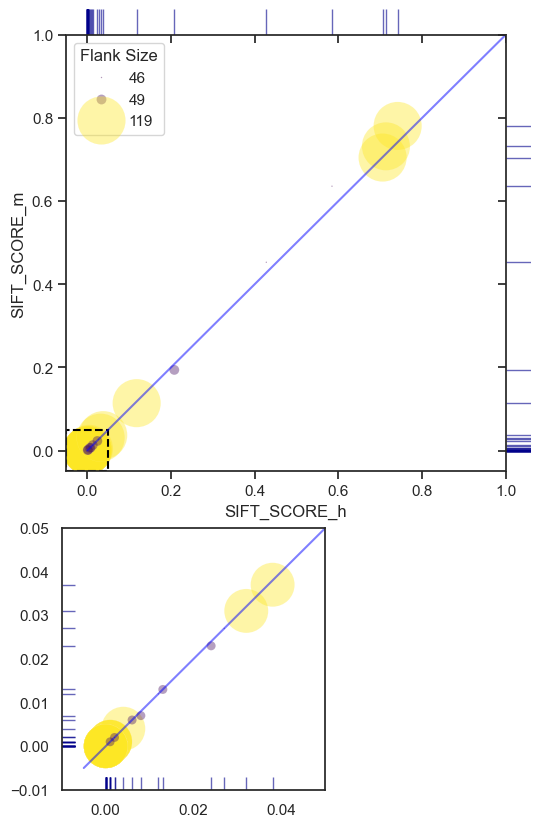

In [163]:
df_SIFT_kit = df_SIFT_kit_ori[df_SIFT_kit_ori['flank_size']>=41].reset_index(drop=True)
df_SIFT_kit['label'] = [f'{x}|{y}' for x,y in zip(df_SIFT_kit['HGVSp_h'], df_SIFT_kit['HGVSp_m'])]
# 创建 JointGrid 并绘制自定义图
g = sns.JointGrid(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", space=0, ratio=17)

# 绘制带颜色映射的散点图
g.plot_joint(
    sns.scatterplot, 
    size=df_SIFT_kit["flank_size"], 
    sizes=(1, 1200), 
    hue=df_SIFT_kit["flank_size"],  # 添加颜色映射
    palette="viridis",  # 选择一个 colormap
    alpha=.4, 
    legend=True
)

# 添加边缘 rugplot
g.plot_marginals(sns.rugplot, height=1, color="darkblue", alpha=.6)

# 在 (0-0.05, 0-0.05) 区域添加虚线正方形框
rect = Rectangle((-.05, -.05), 0.1, 0.1, linewidth=1.5, edgecolor='black', facecolor='none', linestyle='--')
g.ax_joint.add_patch(rect)

# 设置主图的 x 和 y 轴范围
g.ax_joint.set_xlim(-.05, 1)
g.ax_joint.set_ylim(-.05, 1)

# 创建放大区域的 inset axes，大小为主图的 0.6 倍，位置在下方左对齐
ax_inset = inset_axes(g.ax_joint, width="60%", height="60%", loc='lower left',
                      bbox_to_anchor=(-.08, -.8, 1, 1), bbox_transform=g.ax_joint.transAxes, borderpad=2)

# 在 inset axes 中绘制放大区域的散点图
sns.scatterplot(
    data=df_SIFT_kit, 
    x="SIFT_SCORE_h", 
    y="SIFT_SCORE_m", 
    size="flank_size", 
    sizes=(1, 1000), 
    hue="flank_size", 
    palette="viridis", 
    alpha=.4, 
    legend=False,  # 在 inset axes 中不需要图例
    ax=ax_inset
)

# 设置放大区域的 x 和 y 轴范围
ax_inset.set_xlim(-.01, 0.05)
ax_inset.set_ylim(-.01, 0.05)

# 添加 inset axes 的 rugplot
sns.rugplot(data=df_SIFT_kit, x="SIFT_SCORE_h", y="SIFT_SCORE_m", height=0.05, color="darkblue", alpha=.6, ax=ax_inset)
# 去除 inset axes 的刻度
ax_inset.tick_params(left=False, bottom=False)

# 在主图中添加透明的实线对角线
g.ax_joint.plot([0, 1], [0, 1], color='blue', alpha=0.5, linestyle='-')

# 在 inset axes 中添加透明的实线对角线
ax_inset.plot([-.005, 0.05], [-.005, 0.05], color='blue', alpha=0.5, linestyle='-')

ax_inset.set_xlabel('')
ax_inset.set_ylabel('')
ax_inset.tick_params(left=False, bottom=False)
g.ax_joint.legend(title="Flank Size")

plt.savefig('/Users/kexindong/Documents/GitHub/Output/h2m_database/figures/SIFT/flank_size_limit_41.svg')
plt.show()


In [161]:
import numpy as np
from scipy.stats import spearmanr
# 计算Spearman相关性系数和p值
correlation, p_value = spearmanr(df_SIFT_kit['SIFT_SCORE_h'], df_SIFT_kit['SIFT_SCORE_m'])

print(f"Spearman相关性系数: {correlation}")
print(f"p值: {p_value}")

Spearman相关性系数: 1.0
p值: 0.0


In [164]:
import numpy as np
from scipy.stats import spearmanr
# 计算Spearman相关性系数和p值
correlation, p_value = spearmanr(df_SIFT_kit['SIFT_SCORE_h'], df_SIFT_kit['SIFT_SCORE_m'])

print(f"Spearman相关性系数: {correlation}")
print(f"p值: {p_value}")

Spearman相关性系数: 1.0
p值: 0.0


In [ ]:
import numpy as np
from scipy.stats import spearmanr
# 计算Spearman相关性系数和p值
correlation, p_value = spearmanr(df_SIFT_kit['SIFT_SCORE_h'], df_SIFT_kit['SIFT_SCORE_m'])

print(f"Spearman相关性系数: {correlation}")
print(f"p值: {p_value}")